Import necessary libraries

In [48]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import scipy
from scipy.stats import zscore


Load the dataset

In [49]:
df = pd.read_csv("e:/2025/ExtensoData_Internship_Work/Projects/Task_3_EDA/data/transactions.csv")
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False


Step 1: Data quality checks (missing values, duplicates, outliers)

In [50]:
#check basic info
df.info()
#1. check for missing values
missing_values = df.isnull().sum().sort_values
print(missing_values)
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

I want to know the distinct values and thier counts in the 'acqCountry' column to decide how to handle the missing: 3913 value

In [51]:
acqCountry_valueCounts = df["acqCountry"].value_counts(dropna=False)
print(acqCountry_valueCounts)

merchantCountryCode_valueCounts = df["merchantCountryCode"].value_counts(dropna=False)  
print(merchantCountryCode_valueCounts)

merchantCategoryCode_valueCounts = df["merchantCategoryCode"].value_counts(dropna=False)
print(merchantCategoryCode_valueCounts)

posEntryMode_valueCounts = df["posEntryMode"].value_counts(dropna=False)    
print(posEntryMode_valueCounts)

postConditionCode_valueCounts = df["posConditionCode"].value_counts(dropna=False)   
print(postConditionCode_valueCounts)

transactionType_valueCounts = df["transactionType"].value_counts(dropna=False)    
print(transactionType_valueCounts)

cardCVV_valueCounts = df["cardCVV"].value_counts(dropna=False)
print(cardCVV_valueCounts)

enteredCVV_valueCounts = df["enteredCVV"].value_counts(dropna=False)
print(enteredCVV_valueCounts)

creditLimit_valueCounts = df["creditLimit"].value_counts(dropna=False)
print(creditLimit_valueCounts)


hello = df[['merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode']]
print(hello.head(10))


acqCountry
US     632303
NaN      3913
MEX      2626
CAN      1870
PR       1202
Name: count, dtype: int64
merchantCountryCode
US     635577
MEX      2636
CAN      1874
PR       1203
NaN       624
Name: count, dtype: int64
merchantCategoryCode
online_retail           161469
fastfood                101196
entertainment            69138
food                     68245
rideshare                50574
online_gifts             33045
hotels                   22879
fuel                     22566
subscriptions            18376
personal care            16917
mobileapps               14614
health                   14344
online_subscriptions     11247
auto                     10147
airline                   9990
furniture                 7813
food_delivery             4990
gym                       2874
cable/phone               1490
Name: count, dtype: int64
posEntryMode
5.0     255615
9.0     193193
2.0     160589
90.0     16251
80.0     12921
NaN       3345
Name: count, dtype: int64
posCondition

In [52]:
#Handling missing values
#for categorical columns using mode for imputation
df['acqCountry'] = df['acqCountry'].fillna(df['acqCountry'].mode()[0])
df['merchantCountryCode']= df['merchantCountryCode'].fillna(df['merchantCountryCode'].mode()[0])
df['posEntryMode']= df['posEntryMode'].fillna(df['posEntryMode'].mode()[0])
df['posConditionCode']= df['posConditionCode'].fillna(df['posConditionCode'].mode()[0])
df['transactionType']= df['transactionType'].fillna(df['transactionType'].mode()[0])

df.isnull().sum().sort_values

<bound method Series.sort_values of accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
isFraud                     0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
dtype: int64>

In [53]:
#2. Check fo duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


check for outliers
columns we will check: creditlimit, availableMoney, transactionAmount, currentBalance

Checking if the data is normally distributed or not before checking for outliers

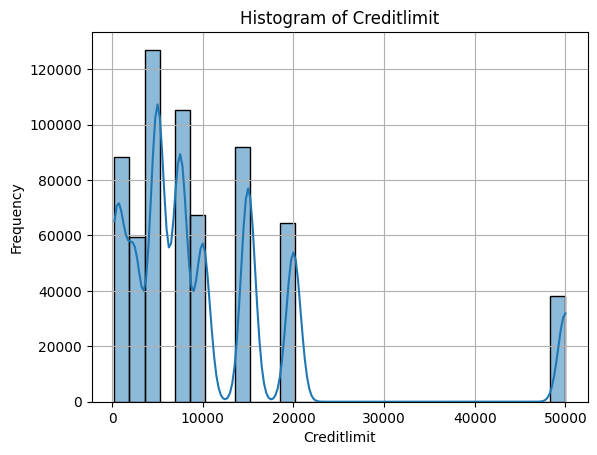

In [54]:
#Histogram
sns.histplot(df['creditLimit'],kde=True, bins=30)
plt.title('Histogram of Creditlimit')
plt.xlabel('Creditlimit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


So creditlimit is positively skewed (right skewed): peak on the left, tail stretching to the right

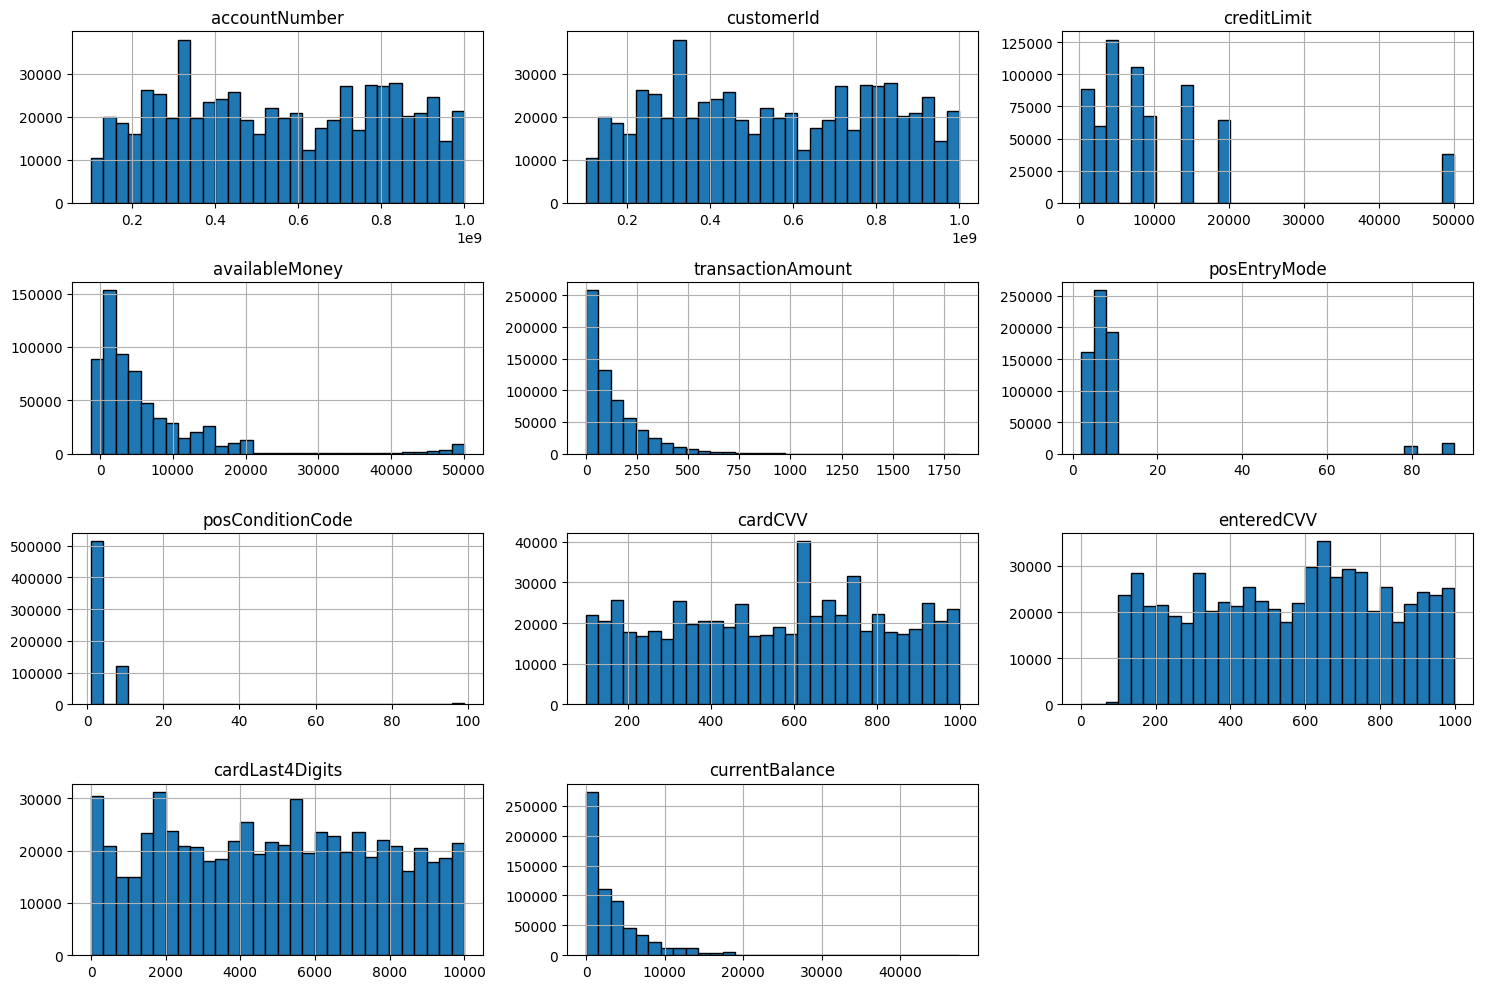

In [55]:
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


Similarly, availableMoney, transactionAmount, currentBalance are also positively skewed . So for outlier detecting using IQR or MAD is more appropriate that Z-score.
IQR = Q3 - Q1
A data point is considered an outlier if it falls below
Q1-1.5* IQR 
or above
Q3 + 1.5* IQR

In [56]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    return (df[column] < lower_bound) | (df[column] > upper_bound)

#making a copy that contains outlier columsn
df_outliers_flagged = df.copy()

#for credit limit
df_outliers_flagged['outliers_creditLimit'] = detect_outliers_iqr(df, 'creditLimit')
#for avaiableMoney
df_outliers_flagged['outliers_availableMoney'] = detect_outliers_iqr(df, 'availableMoney')
#for transactionAmount
df_outliers_flagged['outliers_transactionAmount'] = detect_outliers_iqr(df, 'transactionAmount')
#for currentBalance
df_outliers_flagged['outliers_currentBalance'] = detect_outliers_iqr(df, 'currentBalance')

#single column
df_outliers_flagged['is_outlier_any']= (
    df_outliers_flagged['outliers_creditLimit'].notna() |
    df_outliers_flagged['outliers_availableMoney'].notna() |
    df_outliers_flagged['outliers_transactionAmount'].notna() |
    df_outliers_flagged['outliers_currentBalance'].notna())

outliers_combined = df_outliers_flagged[df_outliers_flagged['is_outlier_any'] == True]

# Show result
print(outliers_combined.head())


   accountNumber  customerId  creditLimit  availableMoney  \
0      733493772   733493772         5000         5000.00   
1      733493772   733493772         5000         4888.67   
2      733493772   733493772         5000         4863.92   
3      733493772   733493772         5000         4676.52   
4      733493772   733493772         5000         4449.18   

   transactionDateTime  transactionAmount merchantName acqCountry  \
0  2016-01-08T19:04:50             111.33         Lyft         US   
1  2016-01-09T22:32:39              24.75         Uber         US   
2  2016-01-11T13:36:55             187.40         Lyft         US   
3  2016-01-11T22:47:46             227.34         Lyft         US   
4  2016-01-16T01:41:11               0.00         Lyft         US   

  merchantCountryCode  posEntryMode  ...       transactionType isFraud  \
0                  US           5.0  ...              PURCHASE    True   
1                  US           9.0  ...              PURCHASE   False

Outliers in creditLimit: 38039
Outliers in availableMoney: 44952
Outliers in transactionAmount: 33506
Outliers in currentBalance: 48233

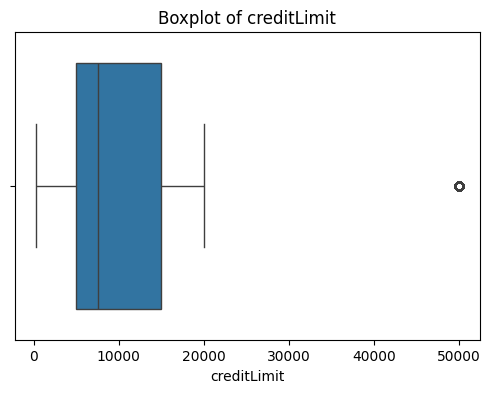

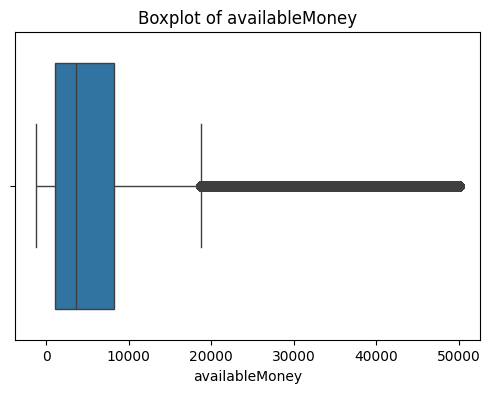

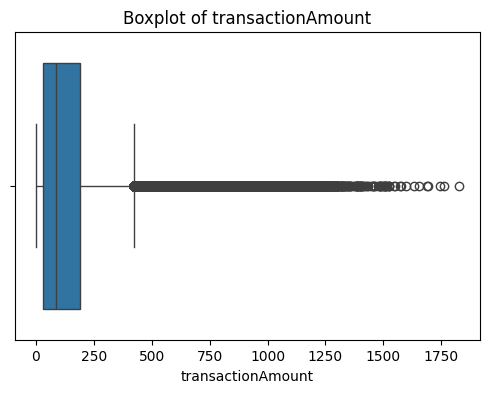

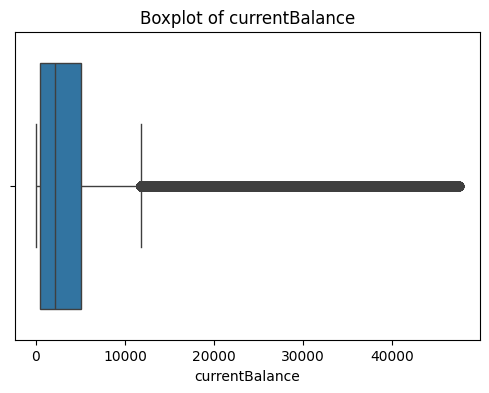

In [57]:
#visualzing outliers

# Boxplot for all four columns
cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


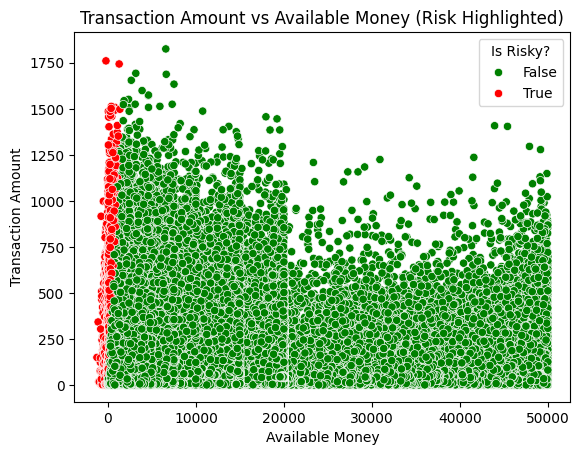

In [58]:
#visualizing outliers using scatter plot: availableMoney vs trasnactionAmout
import seaborn as sns
import matplotlib.pyplot as plt
df['is_risky']= df['transactionAmount']>df['availableMoney']
#spending more than they currentl have available
sns.scatterplot(x='availableMoney', y='transactionAmount', data=df, hue='is_risky', palette={True: 'red', False: 'green'})
plt.title('Transaction Amount vs Available Money (Risk Highlighted)')
plt.xlabel('Available Money')
plt.ylabel('Transaction Amount')
plt.legend(title='Is Risky?')
plt.show()

Summary Statistics and Distributions

In [59]:
df[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']].describe()



,creditLimit,availableMoney,transactionAmount,currentBalance
count,641914.000000,641914.000000,641914.000000,641914.000000
mean,10697.210608,6652.828573,135.162497,4044.382035
std,11460.359133,9227.132275,147.053302,5945.510224
min,250.000000,-1244.930000,0.000000,0.000000
25%,5000.000000,1114.970000,32.320000,502.442500
50%,7500.000000,3578.165000,85.800000,2151.860000
75%,15000.000000,8169.185000,189.030000,5005.890000
max,50000.000000,50000.000000,1825.250000,47496.500000


Correlation Analysis

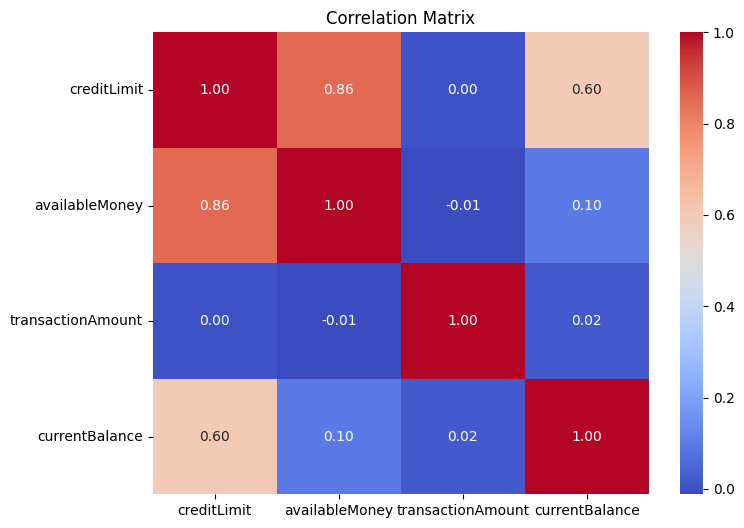

In [60]:
num_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
correlation_matrix = df[num_cols].corr()

#Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title("Correlation Matrix")
plt.show()

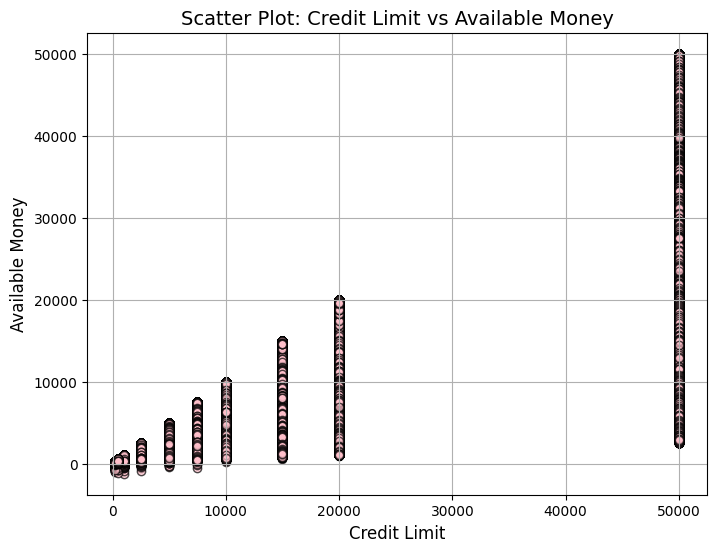

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(df['creditLimit'], df['availableMoney'], alpha=0.7, color='pink', edgecolors='k')

#add labels and title
plt.title('Scatter Plot: Credit Limit vs Available Money', fontsize=14)
plt.xlabel('Credit Limit', fontsize=12)
plt.ylabel('Available Money', fontsize=12)
plt.grid(True)
plt.show()

In [62]:
print(df.dtypes)

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                float64
posConditionCode            float64
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
isFraud                        bool
currentBalance              float64
cardPresent                    bool
expirationDateKeyInMatch       bool
is_risky                       bool
dtype: object


Time-based Analysis
**Converting dates to datetime format**

In [63]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'], format='ISO8601')
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'], errors='coerce')

df['currentExpDate'] = pd.to_datetime(df['currentExpDate'], errors='coerce')  
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'], errors='coerce')

print(df.dtypes)


accountNumber                        int64
customerId                           int64
creditLimit                          int64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                       float64
posConditionCode                   float64
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate             datetime64[ns]
dateOfLastAddressChange     datetime64[ns]
cardCVV                              int64
enteredCVV                           int64
cardLast4Digits                      int64
transactionType                     object
isFraud                               bool
currentBalance                     float64
cardPresent                           bool
expirationDateKeyInMatch              bool
is_risky   

**1. Trend of Transactions Over Time**

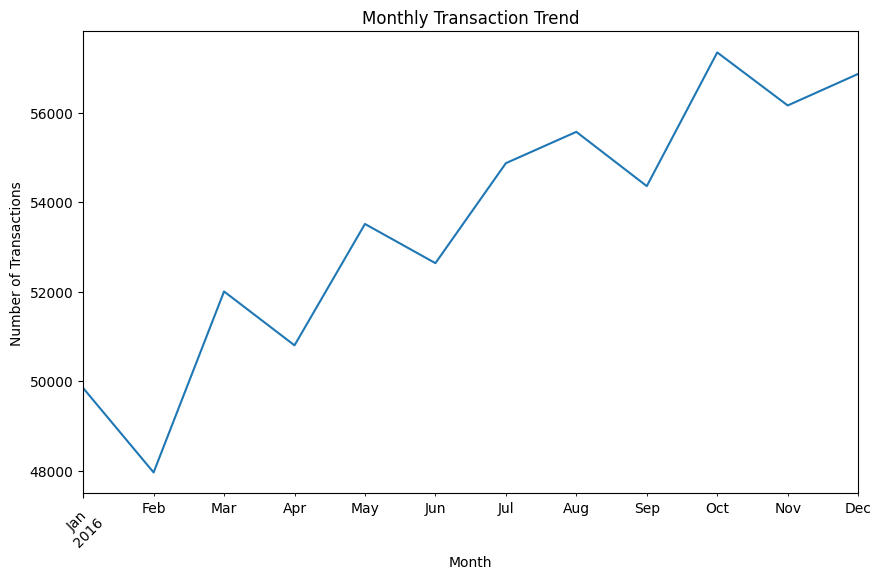

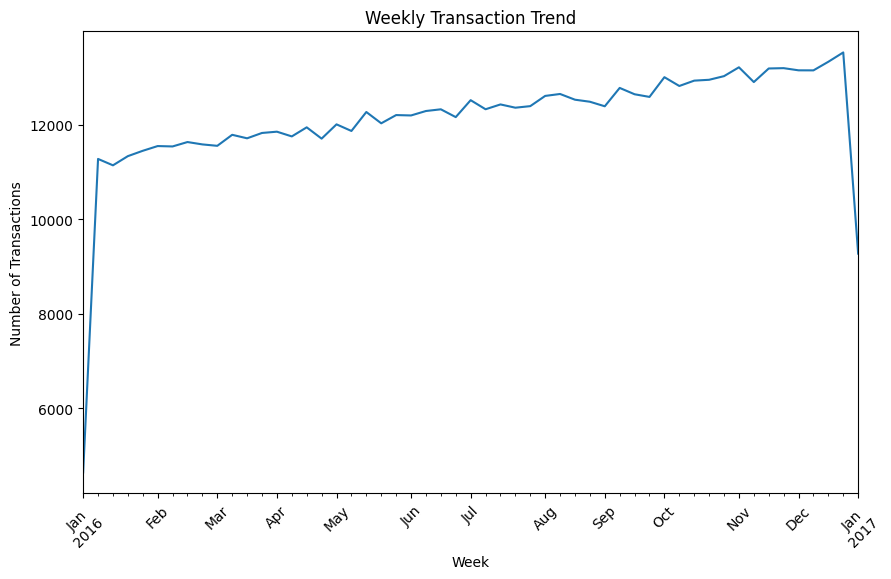

In [64]:
monthly_transactions = df.resample('ME', on='transactionDateTime').size()

plt.figure(figsize=(10,6))
monthly_transactions.plot()
plt.title('Monthly Transaction Trend')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

weekly_transactions = df.resample('W', on='transactionDateTime').size()

plt.figure(figsize=(10, 6))
weekly_transactions.plot()
plt.title('Weekly Transaction Trend')
plt.xlabel('Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


**2. Hour of Day when most transaction and frauds Happen**

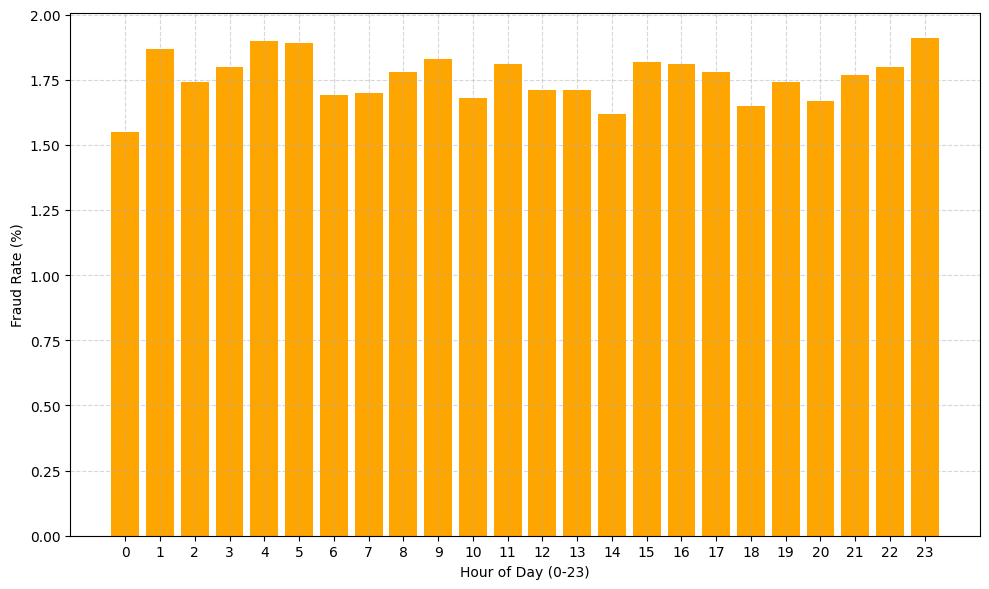

Top 3 hours with highest fraud count:
hour
23    511
4     509
5     509
Name: Fradulent Transactions, dtype: int64
⌚Most transactions happen at hour:  16
🚫Most frauds happen at hour:  23


In [65]:
import matplotlib.pyplot as plt
#step 1: create a temporary copy with only ncessary columns
temp = df[['transactionDateTime', 'isFraud']].copy()

#step 2 : Extract hour from datetime (on temp only)
temp['hour'] = temp['transactionDateTime'].dt.hour

#step 3: total transactions per hour
transactions_by_hour = temp.groupby('hour').size()

#step 4: fradulent transactions per hour
fraud_by_hour = temp[temp['isFraud']==True].groupby('hour').size()

#step 5: combine into one dataframe
hourly_data = pd.DataFrame({
    'Total Transactions': transactions_by_hour,
    'Fradulent Transactions': fraud_by_hour
}).fillna(0)


hourly_data['Fraud Rate(%)'] = ((hourly_data['Fradulent Transactions'] / hourly_data['Total Transactions']) * 100).round(2)
plt.figure(figsize=(10,6))
plt.bar(hourly_data.index, hourly_data['Fraud Rate(%)'], color='orange')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Fraud Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(24))
plt.tight_layout()
plt.show()

print("Top 3 hours with highest fraud count:")
print(hourly_data['Fradulent Transactions'].nlargest(3))

print(f"⌚Most transactions happen at hour: " ,hourly_data['Total Transactions'].idxmax())
print(f"🚫Most frauds happen at hour: ", hourly_data['Fradulent Transactions'].idxmax())

**3. Most Acitve Day of the Week**

🏃‍♀️‍➡️Most transactions happen on: Thursday
🚨Most frauds happen on: Saturday


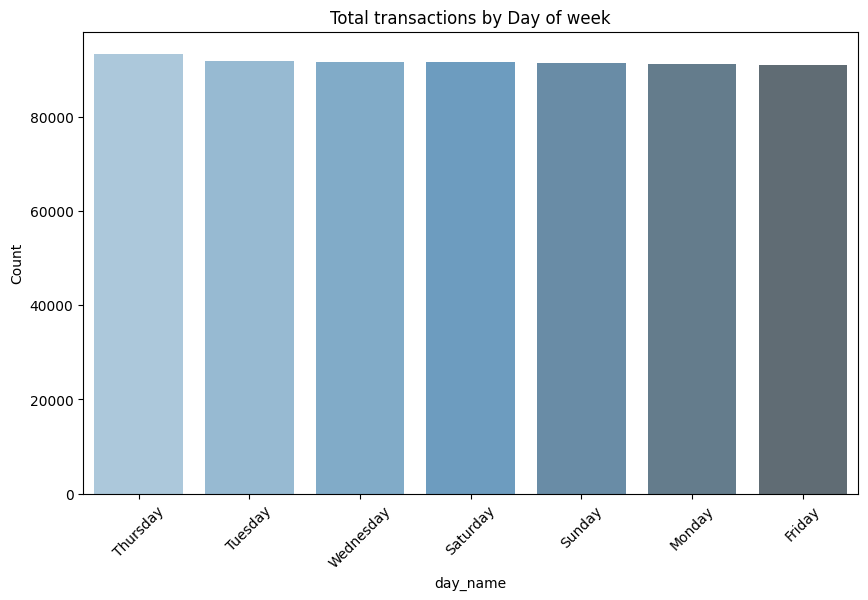

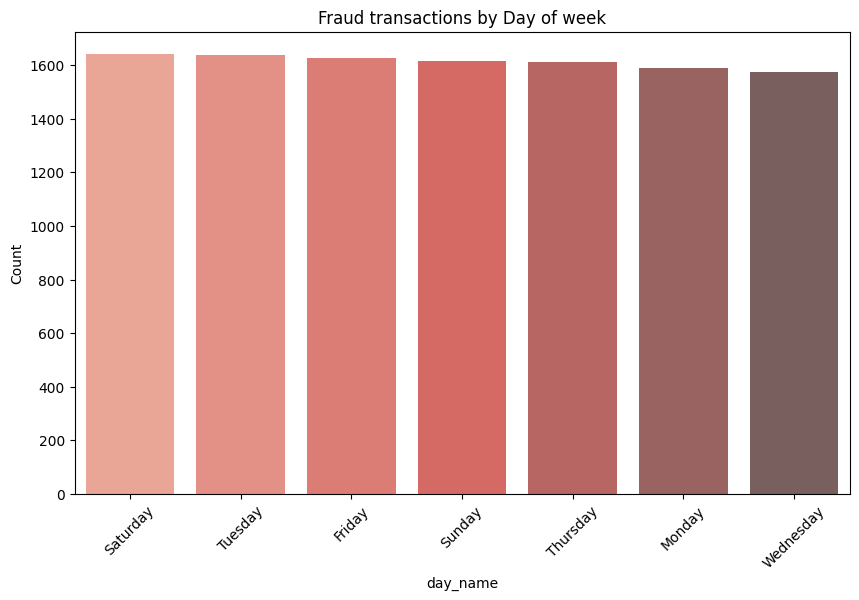

In [66]:
#extract the day of week ( Sunday = 1, Saturday = 7)
import matplotlib.pyplot as plt
temp['day_of_week'] = temp['transactionDateTime'].dt.dayofweek + 1

day_map = { 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
temp['day_name']= temp['day_of_week'].map(day_map)

#total transactons per day
transactions_by_day = temp['day_name'].value_counts()

#fraud transactions per day
fraud_by_day = temp[temp['isFraud'] == True]['day_name'].value_counts()

#most active days
most_active_day = transactions_by_day.idxmax()
most_fraud_day = fraud_by_day.idxmax()

#most active day
print(f"🏃‍♀️‍➡️Most transactions happen on: {most_active_day}")
print(f"🚨Most frauds happen on: {most_fraud_day}")

#transactions per day
plt.figure(figsize=(10, 6))
sns.barplot(x=transactions_by_day.index, y=transactions_by_day.values, hue=transactions_by_day.index, alpha=0.8, label='Total Transactions',palette='Blues_d')
plt.title("Total transactions by Day of week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#fraud per day
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values, hue=fraud_by_day.index,alpha=0.8, label='Fraud Transactions', palette='Reds_d')
plt.title("Fraud transactions by Day of week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()




**Geographical analysis**

**1. Trasaction frequency and transaction amount by country**

In [67]:
transaction_amount_by_country= df.groupby('acqCountry')['transactionAmount'].sum().sort_values(ascending=False)
print(transaction_amount_by_country)

transaction_frequency_by_country = df['acqCountry'].value_counts()
print(transaction_frequency_by_country)


acqCountry
US     85985733.42
MEX      353833.68
CAN      258475.14
PR       164656.85
Name: transactionAmount, dtype: float64
acqCountry
US     636216
MEX      2626
CAN      1870
PR       1202
Name: count, dtype: int64


**2. Fraud rate by country**

acqCountry
CAN    2.67%
PR     2.66%
MEX    2.21%
US     1.75%
Name: isFraud, dtype: object


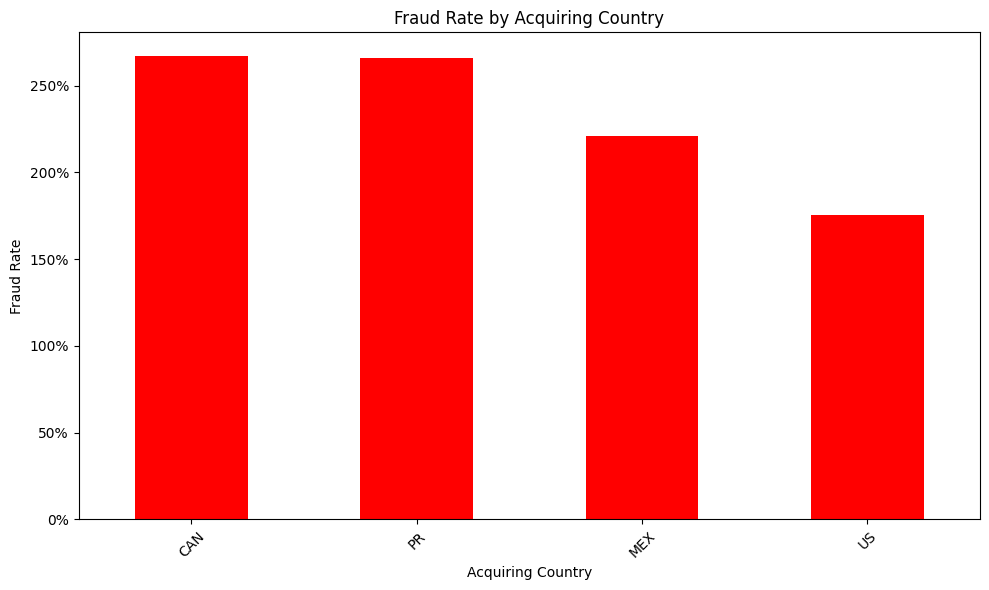

In [68]:
from matplotlib.ticker import PercentFormatter
fraud_rate_by_country = (df.groupby('acqCountry')['isFraud'].mean()*100).sort_values(ascending=False)
print(fraud_rate_by_country.round(2).astype(str)+ "%")

#visualizing fraud_rate_by_country
plt.figure(figsize=(10,6))
fraud_rate_by_country.plot(kind='bar',color='red')
plt.title("Fraud Rate by Acquiring Country")
plt.xlabel("Acquiring Country")
plt.ylabel("Fraud Rate")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Merchant Analysis

What are the most common merchants and merchant categories by transaction count and amount?

In [69]:
# Summing transaction amounts by merchantName
common_merchants_by_transaction_amount = df.groupby('merchantName')['transactionAmount'].sum().sort_values(ascending=False)

print("Top 10 Merchants by Transaction Amount:")
print(common_merchants_by_transaction_amount.head(10))
print(f"Total number of unique merchants: {common_merchants_by_transaction_amount.count()}")
print()  # Empty line for separation

# Summing transaction amounts by merchantCategoryCode
common_merchant_categories_by_transaction_amount = df.groupby('merchantCategoryCode')['transactionAmount'].sum().sort_values(ascending=False)

print("Top Merchant Categories by Transaction Amount:")
print(common_merchant_categories_by_transaction_amount)
print(f"Total number of merchant categories: {common_merchant_categories_by_transaction_amount.count()}")

print()  # Empty line for separation

# Counting transactions per merchant
top_merchants = df['merchantName'].value_counts().head(10)

print("Top 10 Merchants by Transaction Count:")
print(top_merchants)
print()  # Empty line for separation

# Counting transactions per merchantCategoryCode
top_merchant_categories = df['merchantCategoryCode'].value_counts()

print("Top Merchant Categories by Transaction Count:")
print(top_merchant_categories)



Top 10 Merchants by Transaction Amount:
merchantName
Lyft            3686393.55
Uber            3655617.79
target.com      2016053.60
gap.com         2012939.11
oldnavy.com     1997074.48
apple.com       1993628.15
amazon.com      1981064.55
discount.com    1967816.22
alibaba.com     1967538.02
staples.com     1967119.57
Name: transactionAmount, dtype: float64
Total number of unique merchants: 2493

Top Merchant Categories by Transaction Amount:
merchantCategoryCode
online_retail           23621623.09
fastfood                14652056.60
food                    10006006.85
entertainment            9977175.73
rideshare                7342011.34
online_gifts             4753469.71
hotels                   3341620.03
subscriptions            2676663.39
personal care            2496310.35
health                   2080737.57
auto                     1472292.78
airline                  1438939.43
furniture                1147078.10
fuel                      990540.77
food_delivery            

Are there specific merchant categories (merchantCategoryCode) that have higher fraud rates?

In [70]:
fraud_rate_by_merchantCategoryCode = (df.groupby('merchantCategoryCode')['isFraud'].mean()*100).sort_values(ascending=False)
print("MerchantCategory Fraud Rates")
print(fraud_rate_by_merchantCategoryCode.round(2).astype(str)+ "%")


MerchantCategory Fraud Rates
merchantCategoryCode
hotels                  2.84%
online_retail           2.26%
rideshare               2.22%
auto                    2.08%
airline                 2.06%
food                    2.04%
online_gifts            1.98%
health                  1.92%
fastfood                1.72%
entertainment           1.34%
furniture               1.28%
personal care           1.21%
subscriptions           0.95%
cable/phone              0.0%
food_delivery            0.0%
gym                      0.0%
fuel                     0.0%
mobileapps               0.0%
online_subscriptions     0.0%
Name: isFraud, dtype: object


## Fraud Pattern Identification

**1.Which posEntryMode and posConditionCode combinations are risky?**

In [90]:
# df['transactionType'].value_counts()
# df['customerId'].value_counts().head(10)
# df['accountNumber'].value_counts().head(10)
print("Risky combinations of posEntryMode and posConditionCode: with fraud rate")
pos_combinations = df.groupby(['posEntryMode', 'posConditionCode'])['isFraud'].mean().sort_values(ascending=False) * 100
print("Fraud rate by POS Entry & Condition Code:")
print(pos_combinations.head(10))





Risky combinations of posEntryMode and posConditionCode: with fraud rate
Fraud rate by POS Entry & Condition Code:
posEntryMode  posConditionCode
90.0          99.0                10.500000
9.0           99.0                 6.000000
2.0           99.0                 3.509979
9.0           1.0                  2.907952
80.0          99.0                 2.400000
9.0           8.0                  2.122118
90.0          1.0                  2.072579
2.0           1.0                  1.982543
5.0           99.0                 1.542952
2.0           8.0                  1.501877
Name: isFraud, dtype: float64


**2. Fraud rate by transaction type**

In [72]:
fraud_by_transaction_type = (df.groupby("transactionType")['isFraud'].mean()*100).sort_values(ascending=False)
print(fraud_by_transaction_type.round(2).astype(str)+ "%")

transactionType
REVERSAL                1.81%
PURCHASE                1.79%
ADDRESS_VERIFICATION    0.53%
Name: isFraud, dtype: object


**3. Fraud rate by cardPresent flag**

In [73]:
fraud_rate_by_card_present = df.groupby("cardPresent")['isFraud'].mean().sort_values(ascending=False)*100
print(fraud_rate_by_card_present.round(2).astype(str)+ "%")

cardPresent
False    1.95%
True     1.55%
Name: isFraud, dtype: object


**4. Repeated frauds from same customerId or accountNumber**

In [84]:
fraud_accounts = df[df['isFraud']==True]['accountNumber'].value_counts()
print("Accounts with multiple frauds: ")
print(fraud_accounts[fraud_accounts>1])

# Get list of repeated fraud accounts
repeated_fraud_accounts = fraud_accounts[fraud_accounts > 1].index.tolist()

# Filter rows where accountNumber is in repeated fraud list
repeated_fraud_df = df[(df['accountNumber'].isin(repeated_fraud_accounts)) & (df['isFraud'] == True)].copy()


Accounts with multiple frauds: 
accountNumber
311710839    302
318001076    291
353215513    205
251625315    142
822203001    118
            ... 
177821713      2
178295994      2
912085145      2
299893246      2
241012960      2
Name: count, Length: 1372, dtype: int64


**5. Explore patterns: common merchants, amounts, entry modes**

In [89]:
print("-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+")
print("🏪Most frequent merchants in repeated frauds:")
print(repeated_fraud_df['merchantName'].value_counts().sort_values(ascending=False).head(10))
print()
print("-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+")

print("🏪Most frequent merchants category in repeated frauds:")
print(repeated_fraud_df['merchantCategoryCode'].value_counts().sort_values(ascending=False))
print()
print("-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+")

print("💵Most common fraud amounts for repeated accounts: ")
print(repeated_fraud_df['transactionAmount'].value_counts().sort_values(ascending=False).head(10))
print()
print("-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+")

print("🏷️Transaction types used by repeated fraud accounts: ")
print(repeated_fraud_df['transactionType'].value_counts().sort_values(ascending=False))
print() 
print("-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+")

print("👨‍🎤POS Entry modes involved in repeated frauds:")
print(repeated_fraud_df['posEntryMode'].value_counts().sort_values(ascending=False))
print()
print("-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+")

print("🌎Merchant countries involved in repeated frauds: ")
print(repeated_fraud_df['merchantCountryCode'].value_counts().sort_values(ascending=False))
print()
print("-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+")

print("⌛Average time gap between accountOpenDate and trasnactionDateTime for fraudulent trasnactions⌚: ")
repeated_fraud_df['account_age_days'] = (repeated_fraud_df['transactionDateTime'] - repeated_fraud_df['accountOpenDate']).dt.days

# print(repeated_fraud_df['account_age_days'].mean())
print(f"{(repeated_fraud_df['account_age_days'].mean() / 30):.2f} months (approx)")



-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
🏪Most frequent merchants in repeated frauds:
merchantName
Uber             537
Lyft             510
alibaba.com      379
target.com       329
sears.com        326
apple.com        295
oldnavy.com      286
cheapfast.com    275
gap.com          266
discount.com     258
Name: count, dtype: int64

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
🏪Most frequent merchants category in repeated frauds:
merchantCategoryCode
online_retail    3334
fastfood         1597
food             1278
rideshare        1047
entertainment     840
hotels            624
online_gifts      595
health            258
auto              194
airline           187
personal care     185
subscriptions     149
furniture          93
Name: count, dtype: int64

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
💵Most common fraud amounts for repeated accounts: 
transactionAmount
0.00      88
171.51     5
212.60     4
397.29     4
69.02      4
159.52     4
493.13     4
141.01     4
167.77     4
88.8

**6. Do mismatches in CVV or Expiration date correlate with fraud?**

In [91]:
##CVV mismatch
fraud_cvv_mismatch_rate = df[df['cardCVV'] != df['enteredCVV']]['isFraud'].mean()*100

#Expiration mismatch
fraud_expiration_mismatch_rate = df[df['currentExpDate'] != df['expirationDateKeyInMatch']]['isFraud'].mean()*100   

print(f"CVV mismatch fraud rate: {fraud_cvv_mismatch_rate: .2f}%")
print(f"Expiration date mismatch fraud rate: {fraud_expiration_mismatch_rate:.2f}%")

CVV mismatch fraud rae:  3.28%
Expiration date mismatch fraud rate: 1.76%


**7. Spending behavior : Fraud vs Non-fraud**

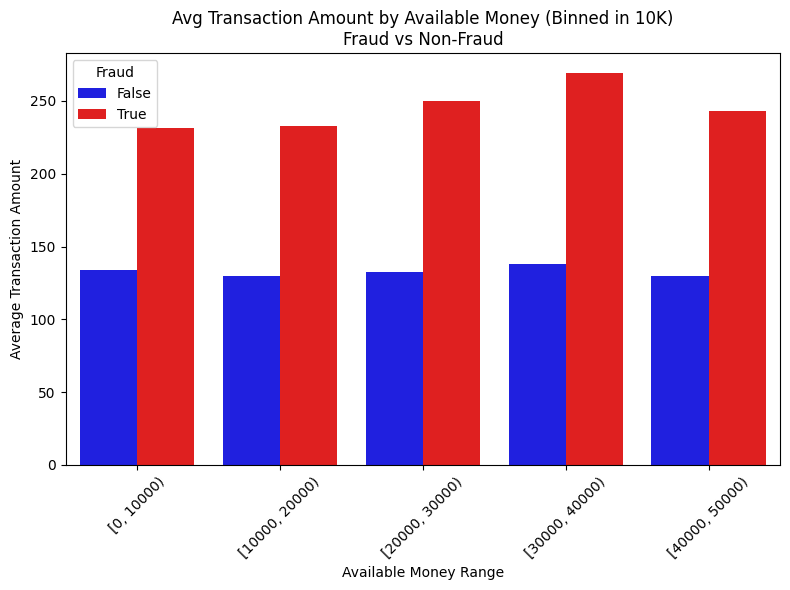

In [98]:


# Bin availableMoney into ranges of 10,000
bin_edges = range(0, int(df['availableMoney'].max()) + 10000, 10000)
df['money_bin'] = pd.cut(df['availableMoney'], bins=bin_edges, right=False)

# Group and calculate average transaction amount
grouped = df.groupby(['money_bin', 'isFraud'], observed=True)['transactionAmount'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x='money_bin', y='transactionAmount', hue='isFraud', palette={False: 'blue', True: 'red'})

plt.title("Avg Transaction Amount by Available Money (Binned in 10K)\nFraud vs Non-Fraud")
plt.xlabel("Available Money Range")
plt.ylabel("Average Transaction Amount")
plt.xticks(rotation=45)
plt.legend(title='Fraud')
plt.tight_layout()
plt.show()


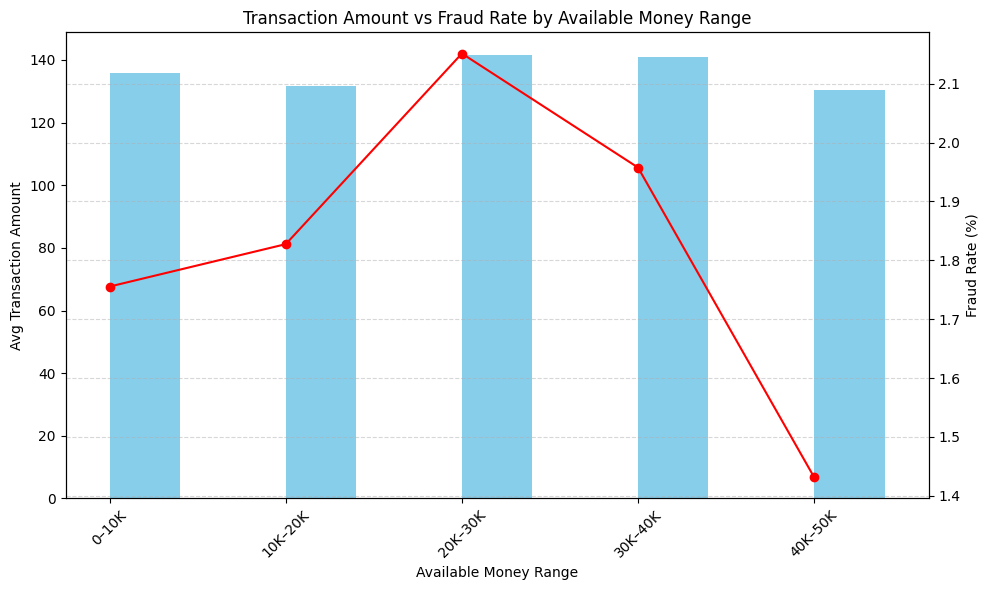

In [102]:
bin_edges = [0, 10000, 20000, 30000, 40000, 50000]
bin_labels = ['0–10K', '10K–20K', '20K–30K', '30K–40K', '40K–50K']
# Bin the 'availableMoney' column
df['money_bin'] = pd.cut(df['availableMoney'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Aggregate with observed=False (current behavior)
avg_amount = df.groupby('money_bin', observed=False)['transactionAmount'].mean()
fraud_rate = df.groupby('money_bin', observed=False)['isFraud'].mean() * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for average transaction amount
avg_amount.plot(kind='bar', color='skyblue', ax=ax1, position=0, width=0.4, label='Avg Transaction Amount')
ax1.set_ylabel("Avg Transaction Amount")
ax1.set_xlabel("Available Money Range")

# Line plot for fraud rate
ax2 = ax1.twinx()
fraud_rate.plot(kind='line', color='red', marker='o', ax=ax2, label='Fraud Rate (%)')
ax2.set_ylabel("Fraud Rate (%)")

# Title and layout
plt.title("Transaction Amount vs Fraud Rate by Available Money Range")
ax1.set_xticklabels(bin_labels, rotation=45)
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
